$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo, HTML, Video
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive, rcParams, animation
from ipywidgets import interact, FloatSlider, fixed, IntSlider
from scipy.constants import pi  # otherwise it's too annoying to type np.pi
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *These notes are an adaptation of the beginning of Chapter 12 of Taylor, which is not a required textbook. Our librarian was able to make this chapter available on Quercus.*
* *Baker & Gollub is a whole textbook devoted to the topic of chaos, which we will introduce in the latter part of this document. You can use it as a side resource if you need more info about a particular topic.*
* **Note:** *I don't know where lecture 10 will end and lecture 11 will begin. Try to work on both as a whole.*

# Expectations

## Remember

* In non-linear oscillators, the frequency can depend on the amplitude.
* In non-linear oscillators, Fourier modes exchange energy.
* Fourier analysis helps, knowing the frequency content of a given oscillation (I do *not* request that you fully understand how it works)
* A damped-driven pendulum can develop non-linear oscillations for moderately strong driving, and chaos for stronger driving.
* Necessary conditions for chaos in a continuous time system.
* What a Poincaré section is in general.

## Understand

* 3D phase space for the DDP: try to visualize how trajectories work, even though we are aware that it takes a bit of practice.

## Apply

* Integrate numerically a non-linear oscillator equation. 
* Create a time series visualization.
* Create a phase-space trajectory (I will sometime plot the potential energy in the background; This is purely informational and aesthetic, and I am NOT requiring that you know how to do this).
* Create a Poincaré section.

Notice that I am not requesting anything about how to plot the Fourier coefficients like I will do.
This is again probably too advanced.

# Introduction

Most of what we have seen was about linear motions:  linear oscillations, linear damping, linear forcing, linear modes, linear waves.
Linear motions, in a way, all look the same.
We took mechanical examples as an excuse to study very generic phenomena that exist as soon as something has inertia and a restoring force.
In electronic circuits, inertia is provided by inductance and restoring is provided by capacitance, but they behave exactly the same way.
So, in a way, all the math and physics we have done are a series of invaluable building blocks to help us tackle many, if not all, sub-domains of physics and beyond.

When non-linearity is included however, things become trickier. There are a lot of non-linear phenomena, and while there are some universal elements to it, there is also a lot of diversity.
At our level, we still have too few tools to tackle these systems with pen-and-paper (and to be fair, those often only get you so far), but we have learned a lot about visualizing complex phenomena.
So, we will use these tools a lot to visualize complex phenomena, and leave the detailed math for when you grow up.

# Non-linear pendulum

## General behaviour

We know this one, its equation of motion is 
$$\ddot \theta + \omega_0^2\sin\theta = 0,$$
with the caveat that $\omega_0$ is the angular frequency of oscillations only in the weak-amplitude (linear) limit.
We also saw that it had a neat expression for the period of oscillation, namely,
\begin{equation}
    T = \frac{2\sqrt{2}}{\omega_0} \int_0^{\Theta}\frac{\di \theta}{\sqrt{\cos\theta - \cos\Theta}},
    \label{eq:TNL}
\end{equation}
where $\Theta$ (capital $\theta$) is the maximum angle of oscillation, assuming it is not undergoing rolling motion.
We can find this expression based on conservation of energy (see lecture 6).

Its energy (shades) and possible bound trajectories (red lines; separatrix is dashed) are shown below.

In [2]:
ftsz = 12  # font size
m = 1.0  # [kg] mass
g = 9.8  # [m/s2] gravity
l = 1.0  # [m] pendulum length
omega0 = (g/l)**.5

In [3]:
# theta and dottheta values
th = np.linspace(-pi, pi, 500)
dotth = (g/l)**0.5*np.linspace(-2.5, 2.5, 500)

[thg, dotthg] = np.meshgrid(th, dotth)  # gridded values
# U = m*g*l*(1-np.cos(th))  # for PE vs theta plot
Eg = 0.5*m*l**2*dotthg**2 + m*g*l*(1-np.cos(thg))  # for contouring
    
def E_pendulum_phaseplot():
    plt.figure(figsize=(5, 4))
    plt.contourf(thg/pi, dotthg, Eg/(m*g*l), 32)  # plot contours
    plt.colorbar(orientation='horizontal')  # add colorbar
    # red contour overlay for phase trajectories
    plt.contour(thg/pi, dotthg, Eg/(m*g*l),
                [2.], colors='r', linestyles='--')
    plt.contour(thg/pi, dotthg, Eg/(m*g*l),
                [0.1, 0.5, 1., 1.5], colors='r')
    plt.xlim([th[0]/pi, th[-1]/pi])
    plt.ylim([dotth[0], dotth[-1]])
    plt.grid('on')
    plt.title(r'$E/(mg\ell)$ in phase space')
    plt.xlabel(r'$\theta/\pi$')
    plt.ylabel(r'$\dot\theta$ [rad/s]')

    plt.tight_layout()
    return


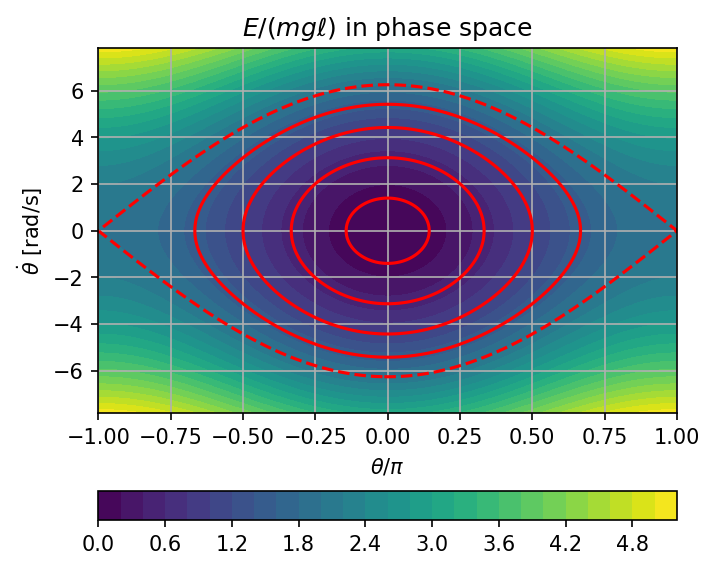

In [4]:
E_pendulum_phaseplot()

So, at low energy (near the bottom of the well), we have SHM (ellipses), and as the energy or equivalently $\Theta$ increase, the trajectories in phase space get more distorted.
Let's see how this distorsion is reflected in the time series.

There is no easy analytical expression for $\theta$ in the general case. So instead, we will use the Euler-Cromer method. In fact, the histories of computers and non-linear oscillations are intricately tied: before computers, scientists were very limited in their study of non-linear oscillators. But the reverse is also true: the first numerical simulation, which was performed in the 1950's[^1] and which is now called the Fermi-Pasta-Ulam-Tsingou experiment, was set up to study a chain of 64 oscillators with weakly non-linear coupling. See the Appendix for more details.

[^1]: Yes, the first simulation. Computers had been around for years by that point, but people were using them to "compute numbers", the way you'd use your calculator, faster than human calculators would. The idea of doing these calculations repeatedly to conduct a virtual experiment, not quite knowing what the outcome would be, turned out to be revolutionary, although I am not sure how much it was appreciated at the time.

In [5]:
def ddtheta(theta, omega0):
    """ Second time derivative of theta """
    return -omega0**2*np.sin(theta)

Theta = -0.75*pi  # [rad] maximum angle

In [6]:
from scipy.special import ellipk
T = 4*ellipk(np.sin(Theta/2)**2)/omega0  # Total cheat! I am not computing the integral
# See https://en.wikipedia.org/wiki/Pendulum_(mathematics)#Arbitrary-amplitude_period
print("Period is T = {} s".format(T))

Period is T = 3.0667282074534574 s


In [7]:
# Weakly non-linear pendulum
ntT = 500  # number of time steps per period
nT = 3.  # number of periods
dt = T/ntT  # duration of one time step
time = np.arange(0., T*nT, dt)  # time array
nt = len(time)  # total number of iterations

In [8]:
# Initialize theta, dtheta/dt
theta = 0*time
dottheta = 0*time

# Set first element of theta and dottheta to initial conditions.
theta[0] = Theta
dottheta[0] = 0.0

# generate theta and dottheta with the Euler-Cromer method
for i in range(nt-1):
    dottheta[i+1] = dottheta[i] + dt*ddtheta(theta[i], omega0)  # update dottheta
    theta[i+1] = theta[i] + dottheta[i+1]*dt  # use updated dottheta

In [9]:
def plot_TS(t, T, th, dth):
    """ draw time series; th is theta, dth is dtheta/dt"""
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t/T, th/pi)
    plt.ylabel(r'$\theta/\pi$')
    plt.xlabel(r'$t/T$')
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.plot(t/T, dth)
    plt.ylabel(r'$\dot\theta$ [rad/s]')
    plt.xlabel(r'$t/T$')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    return

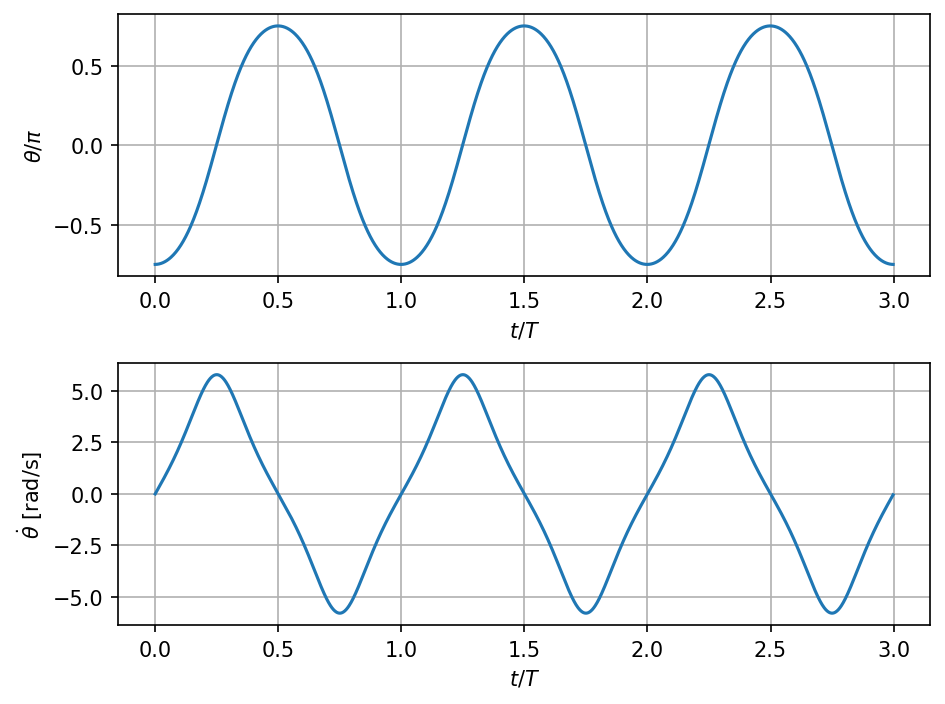

In [10]:
plot_TS(time, T, theta, dottheta)

So, as expected, the pendulum oscillates with period $T$, but the oscillations aren't quite sinusoidal.
On the $\theta$ curve, the sine function look a little squeezed, though it's not super obvious.
The $\dot\theta$ curve is more notably a-sinusoidal, with flatter slopes and pointier tops.
How can we visualize this better?
First, try a phase plot.

In [11]:
def plot_phase(th, T, dth):
    """ draw phase plot; th is theta, dth is dtheta/dt"""
    plt.figure(2)
    plt.plot(th/pi, dth, '.', markersize=0.5)
    # plt.scatter(th/pi, dth, c=time, s=0.25, alpha=0.5)
    plt.ylabel(r'$\dot\theta$ [rad/s]')
    plt.xlabel(r'$\theta/\pi$')
    plt.grid()  
    # plt.axis(xmin=-1, xmax=1)
    plt.show()
    return

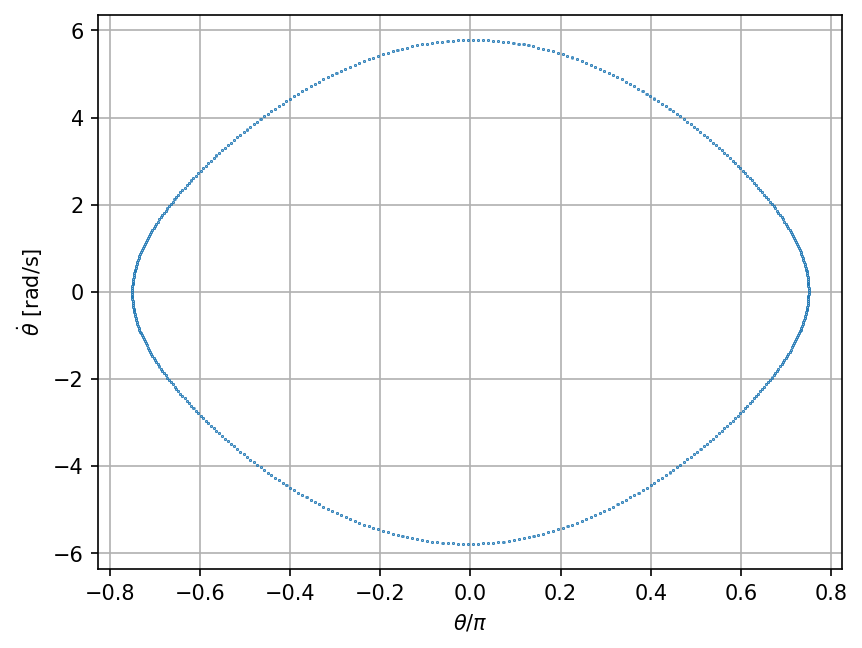

In [12]:
plot_phase(theta, T, dottheta)

The phase plot looks a little more diamond-like, indicating that the nice ellipses of SHM are gone.

## Fourier analysis

We saw in lecture 9 that there is a tool to analyse periodic signals: the Fourier series.
It isn't clear at this point what nail this hammer will find, i.e., what question, we are looking to answer, but let's try anyway.
Let's find the coefficients $A_n$ and $B_n$ such that
$$ \theta(t) = \frac{A_0}2 + \sum_{n=1}^\infty\left[A_n \cos\left(\frac{2n\pi t}{T}\right) + B_n \sin\left(\frac{2n\pi t}{T}\right)\right].$$
In fact, we can see on the plot that $\theta$ is an even function (any initial condition with zero velocity is; any initial condition with zero position and non-zero velocity would be and odd function), so we can drop the $B_n$'s right away and focus on the $A_n$'s:
$$A_n = \frac2T\int_{0}^{T}\theta(t)\cos\left(\frac{2n\pi t}{T}\right)\di t.$$

*Note: As I warned in lecture 9, the notations are a bit different from then because in lecture 9, I was assuming that the function had period $2L$.*

We don't know the expression for $\theta$ (that's the idea: if we knew it, we wouldn't try so many different ways to visualize it), so we need to compute them numerically.
Because we computed $\theta$ for a duration of three periods, we can simply integrate over the whole interval and divide by three (and we will be a smidge more accurate).

I will compute the first few $A_n$'s by explicitely computing the integral with the trapezoidal method, but I will also use an uber-classical algorithm to compute the coefficients, the Fast Fourier Transform (FFT), just to show that it computes the same thing (I will not time it, but it does compute all coefficients much faster than the trapezoidal integration).

***

*A few words to understand how I use the `rfft` routine below, although you are not expected to understand how or why it works. If you are just willing to believe me when I say that twice the output of the `rfft` is equivalent to (in fact, better than, because the routine designed by pros) computing the $A_n$'s and $B_n$'s above, then you can skip this part.*

*The FFT algorithm computes the complex version of a Fourier series. That is, at each point $t_k$ in the time series, with $k = 0$, $1$, ..., $K-1$, with $K$ the total number of points in the time array, the value $\theta_k = \theta(t_k)$ is given by*
$$\theta_k = \sum_{n=0}^{K-1}a_n\exp\left(\ci\frac{2\pi n t_k}{T}\right),$$
*with $a_n$ the complex Fourier coefficient for each mode.*
*Note that there are as many modes as there are grid points ($K$): that's because we are back to a discrete system, and the number of modes is not infinite anymore.*

*The complex Fourier coefficients are given by*
$$a_n = \frac{1}{K}\sum_{k=0}^K\theta_k\exp\left(-\ci\frac{2\pi n t_k}T\right),$$
*which is the discrete equivalent of the integrals for $A_n$ and $B_n$. In fact, a formula sheet about Fourier series (e.g., https://en.wikipedia.org/wiki/Fourier_series#Definition) would tell you that $a_n = (A_n - \ci B_n)/2$. So, for our even function $\theta$ for which $B_n\equiv 0$, we have $A_n = 2a_n$. It is almost what is coded below, except that the FFT algorithm works with complex numbers, and real numbers are treated as complex numbers with a zero imaginary part (for example, when the FFT implementation wants to output what we would call the number 2, it would really output `2+0j`), and Matplotlib doesn't plot complex numbers, even if the imaginary part is zero. It does plot the real part automatically, but it complains about it, so, we take the real part of the $a_n$'s to supress any discontent.*

*In general, the function we compute the Fourier series of can be complex. But because the $\theta_k$'s are real, there is a symmetry in the $a_n$'s, namely that $a_n = a_{K-n}^*$, and the `rfft` uses that property to only compute half the modes, which is faster.*

***

In [13]:
Nmodes = 10  # we compute the first 10 modes with trepezoidal integration
An = np.empty(Nmodes)
for n in range(Nmodes):
    An[n] = np.trapz(theta*np.cos(2*n*pi*time/T), time)*2/T/nT 

In [14]:
# We use NumPy's Fast Fourier Transform routine to compare
from numpy.fft import rfft  # the FFT for real entries
an = rfft(theta[:ntT], norm="forward")
# "forward" means that the Fourier coefficients are normalized, which is
# how I have written them in the lecture notes 

In [15]:
def plot_Fourier():
    plt.plot(An, 'o', label='$A_n$')  # trapezoidal values
    plt.plot(2*np.real(an), '+', label=r'$2$Re$(a_n)$')
    plt.plot(2*np.imag(an), 'x', label=r'$2$Im$(a_n)$')
    plt.xlim(0., Nmodes)
    plt.xlabel('mode number')
    plt.ylabel('Fourier coefficient')
    plt.legend()
    plt.grid()

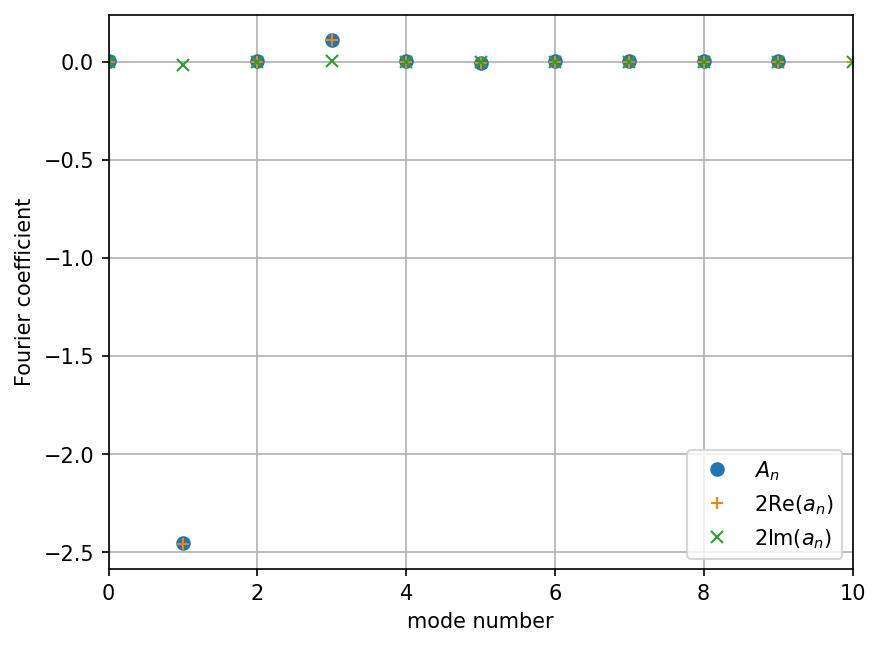

In [16]:
plot_Fourier()

Above, the solid dots (trapezoidal integration method) show the same result as the upright orange crosses (`rfft` method): a dominant mode-1 (i.e., an oscillation of frequency $1/T$), and we have confirmed, or illustrated, that the `rfft` routine does the work of the integrals for the $A_n$'s.

But there is more: the mode-3 (frequency $3/T$) seems to show some activity, and there might be more.
So, there seems to be valuable information in the weaker modes, because that's where the deviation from linearity seems to exists.
We can't prove at this point, but at at the very least, we should find a way to plot it better.

This problem is actually very common in nonlinear systems: the higher harmonics are where it's at, even though they are weaker.
One common solution is to plot spectra on a semi-log scale, i.e., to plot the $|A_n|$'s in log-scale.

In [17]:
def plot_semilog():
    plt.semilogy(abs(An), 'o-', label='$|A_n|$')
    plt.semilogy(2*abs(an), '+--', label=r'$2|a_n|$')
    plt.xlim(0., Nmodes)
    plt.ylim(1e-13, 1e1)
    plt.xlabel('mode number')
    plt.ylabel('Fourier coefficient')
    plt.legend()
    plt.grid()

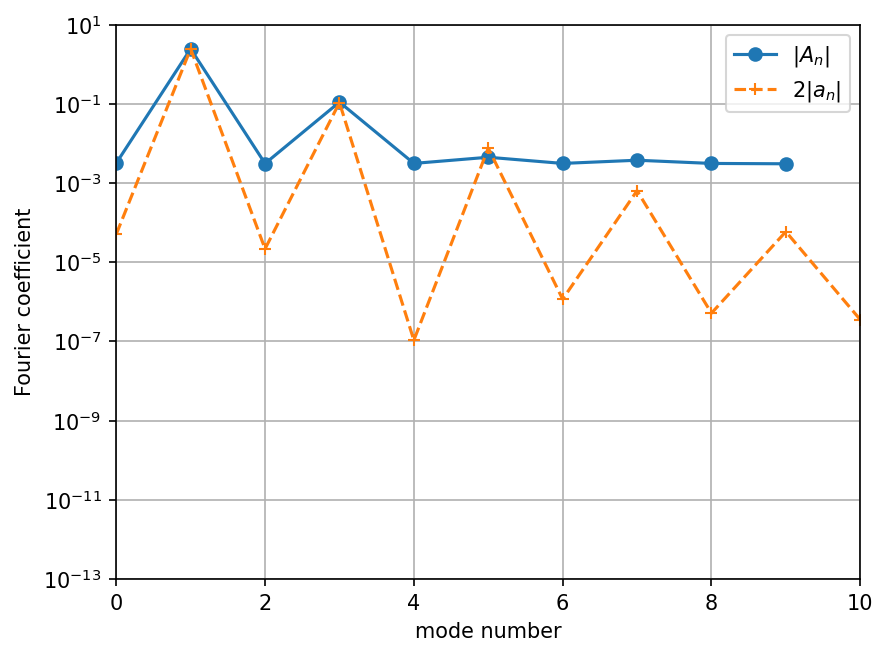

In [18]:
plot_semilog()

The two methods agree when there is a strong signal, but when the modal amplitude is weak, the `rfft` method gives less amplitude. As the mode number goes up, the `rfft` method still shows harmonics, while the "pedestrian" method gives a background amplitude that is too high to distinguish any harmonic past the 7th harmonic.

Which method is more trustworthy? As of the time I am writing these notes, I have no definite proof, but I know that:

* The `rfft` method is a tried-and-tested method, while my way to integrate was done a bit naively, it was the first thing to try, and I did;
* These higher harmonics at $n=7$, $9$, and probably higher, are a real thing;
* If you try to increase `ntT` (the number of points per oscillation period), you will see the even coefficients's magnitudes decrease in both methods, but more so in my own method. This indicates that my method might not be as precise as `rfft`.

For these reasons, I trust the `rfft` method more than my own, and will use it from now on.

And what about the physics? We do see that the first harmonic dominates indeed, highlighting the fact that most of the contribution to the motion is in the sinusoidal oscillation of period $T$.
But there is more than just this one harmonic: every odd mode has some amplitude in it, and the amplitudes decay by what appears to be a constant factor each time: $|A_{n+2}| = \rho|A_n|$, with $\rho <1$.
We can't know for sure if $\gamma$ is constant except for this anecdotal piece of evidence, not without more work anyway, but the fact is that there is more than one harmonic.

Can we know for sure that the existence of these harmonics is due to non-linear effects?
After all, when we pluck a string, we had many harmonics superposing, and the dynamics were linear.
One test you can do is take the code above and increase the degree of nonlinearity: try successively the values $\Theta = \pi/4$, $\pi/2$, $2\pi/3$, $3\pi/4$, $0.99\pi$... You should see the harmonics grow in importance, and this increment $\rho$ become larger and closer to one.

But we can also do a bit of elementary math to show that it is indeed the case for weakly non-linear oscillations, and therefore *a fortiori* for strongly non-linear ones.

## Weakly nonlinear pendulum

For small-but-not-too-small angles, we can expand the times series for the sine to two orders, i.e., $\sin \theta \approx \theta - \theta^3/3!$, and the ODE becomes
\begin{equation}
    \ddot \theta + \omega_0^2 \theta = - \frac{\omega_0^2}{6}\theta^3,
    \label{eq:weakNLpendulum}
\end{equation}
with the non-linear term purposely left on the RHS to make it look as if it is forcing the SHO.

What is the frequency of that "forcing"?
Let's make a first guess and assume that the whole thing oscillates at $\omega =2\pi/T$, but that it does so sinusoidally, which isn't too bad an assumption in the weakly non-linear case.
That is, $\theta \approx \Theta\cos(\omega t)$.
In that case, the non-linear forcing is proportional to $\cos^3(\omega t)$, which is
\begin{align*}
    \cos^3(\omega t)  & = \left(\frac{\eexp{\ci\omega t} + \eexp{-\ci \omega t}}{2}\right)^3 \\
                    & = \frac18\left(\eexp{3\ci\omega t} + 3\eexp{\ci\omega t} + 3\eexp{-\ci\omega t}+e^{3\ci\omega t}\right)\\
                    & = \frac{\cos(3\omega t) + 3\cos(\omega t)}4.
\end{align*}

So, it's like the non-linear term takes in that signal at $\omega$, and turns it in part into a forcing, oscillating at $3\omega$.
Recall that in the spectrum, we saw the frequencies $\omega$ and $3\omega$ first.
This forcing is weak: its pre-factor is $\Theta^3/6$, which is much smaller than the "primary"  amplitude $\Theta$ if the non-linearity is weak, namely, if $\Theta \ll 1$, but it is there.

Now, the LHS of equation \eqref{eq:weakNLpendulum} responds to this forcing and develops an oscillation at $3\omega$.
A more accurate signal should then be $\theta \approx \Theta_1\cos\omega t + \Theta_3 \cos(3\omega t)$.
But if you plug it back into the non-linear term $\omega^2\theta^3/6$, you will create more frequencies! Only frequencies that are odd though, which you can check by cubing the new $\theta$[^2].
So, you create $5\omega$, $7\omega$, and so on, just like we saw on the spectra above.
But each time, this non-linear forcing is weaker, and the harmonics aren't as strong.

This is true for weak non-linearity, but it must also be true for strong non-linearity.
Indeed, as you add up more and more corrections in the Taylor expansion ($\sin\theta \approx \theta - \theta^3/3! + \theta^5/5! - \theta^7/7!\dots$), you can only create more and more occasions to create more and more frequencies.

This is one fundamental feature of non-linear systems: **modes exchange energy**. 
We still have relations like $E = \sum_{n=1}^\infty E_n$ as for linearly coupled oscillators or waves, but in the linear case, we always had expressions of the type $E_n\propto m\omega_n^2 A_n^2$, where $\omega_n$ and $A_n$ did not depend on what was going on in the other modes.
Here, the big difference are that the frequencies depend on the amplitude via equation \eqref{eq:TNL}, the $A_n$'s are not just proportional to $\Theta$ anymore, and as a consequence, the $E_n$'s are not independent from one another. The amount of energy in each mode depends on how much energy there is in the other modes.
For example, in our pendulum, how big $\Theta^3$ was would influence how big $\rho$ (the one from $|A_{n+2}|  =\rho|A_n|$) was.

[^2]: it is informative to do this sort of exercise once in your life. To do it a second time would be somewhat silly.

# The damped, driven pendulum (DDP)

The non-linear oscillations we just saw were all well-behaved, in a way: we had solutions with closed expressions, and their form was predictable over time.
Often with non-linear systems though, predictability is not guaranteed, and we often encounter what physicists call "chaos". Let's study the simplest system, one could think of, that exhibits chaos.

That is, let's go back to our non-linear pendulum, and tweak it so that it is now (lightly) damped and driven at angular frequency $\omega_d$ (NOT the damped pseudo-frequency of lecture 4; I am redefining $\omega_d$ to be the driving frequency, because I will need to keep $\omega$ as a free variable).
The equation of motion becomes for the damped, driven (DDP) pendulum becomes
$$\ddot \theta + 2\gamma \dot \theta + \omega_0^2\sin\theta = \omega_0^2 \beta \cos(\omega_d t),$$
with $\beta$ some measure of how hard we drive it.

Before analyzing this system further, let's code it up and see what it does.
I will use the notation $T_d = 2\pi/\omega_d$ for the driving period.

In a first time, I will plot three types of plots:

* regular time series, $\theta/\pi$ as a function of $t/T_d$,
* $(\theta/\pi, \dot \theta/(\pi\omega_d))$ phase plots (phase trajectories in red, potential energy in faint shades),
* $\theta_n(\omega)$ spectra.

In [19]:
omegad = 2*omega0/3  # driving frequency
Td = 2*pi/omegad  # driving period
gamma = omega0/4  # damping
ntTd = 500  # number of time steps per driving period

In [20]:
dt = Td/ntTd  # time step
num_cycles = 40  # number of driving periods
t_end = num_cycles*Td  # final time
nt = ntTd*num_cycles  # number of time steps

time = np.arange(0., t_end, dt)  # initialize the time array

In [21]:
theta0 = -pi/2  # initial angle
dottheta0 = 0.0  # initial angular velocity

In [22]:
# function that returns theta acceleration accounting for gravity, forcing, damping
def ddtheta_ddp(th, dth, wd, w0, g, t, b):
    """ returns theta acceleration accounting for natural frequency w0, 
    forcing frequency w and amplitude b, damping g, system state th and dth """
    return -w0**2 * np.sin(th) - 2*g*dth + b*omega0**2*np.cos(wd*t)

In [23]:
def generate_time_series(th0, dth0, wd, w0, b, g, t):
    """ Generate theta and dtheta/dt with the Euler-Cromer method
    th0 = initial angle,
    dth0 = initial angular velocity,
    wd = driving frequency
    w0 = natural oscillation frequency
    t = time array
    b = driving amplitude
    g = damping coefficient """
    dt = t[1] - t[0]  # time step
    th = 0*t  # initialize theta array
    th[0] = th0  # initial angle
    dth = 0*t  # initialize dtheta/dt
    dth[0] = dth0  # initial angular velocity
    for i in range(0, len(t)-1):
        # First, update dtheta/dt
        dth[i+1] = dth[i] + dt*ddtheta_ddp(th[i], dth[i], wd, w0, g, t[i], b)
        # Second, use updated dtheta/dt to update theta
        th[i+1] = th[i] + dt*dth[i+1]
    
    return th, dth

In [24]:
beta = 0.2  # driving amplitude = F0/(m L omega0**2) with F0 driving torque
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

In [25]:
def plot_TS_ddp(th, dth, wd, w0, b, g, t, ftsz, tmin):
    """plot time series of th. t must be time/Td, ftsz is font size,
    tmin is the minimum (in order to ged rid of initial transient) """
    
    maxth = max(th[t>tmin])/pi
    minth = min(th[t>tmin])/pi
    
    maxdth = max(dth[t>tmin])/pi/wd
    mindth = min(dth[t>tmin])/pi/wd
    
    plt.subplot(2, 1, 1)
    plt.plot(t, th/pi)
    plt.grid()
    plt.xlabel(r"$t/T_d$", fontsize=ftsz)
    plt.ylabel(r"$\theta/\pi$", fontsize=ftsz)
    plt.xlim(tmin, t[-1])
    plt.ylim(minth, maxth)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, dth/pi/wd)
    plt.grid()
    plt.xlabel(r"$t/T_d$", fontsize=ftsz)
    plt.ylabel(r"$\dot\theta/(\pi\omega_d)$", fontsize=ftsz)
    plt.xlim(tmin, t[-1])
    plt.ylim(mindth, maxdth)
    
    plt.suptitle(r"Time series for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    plt.tight_layout()
    plt.show()

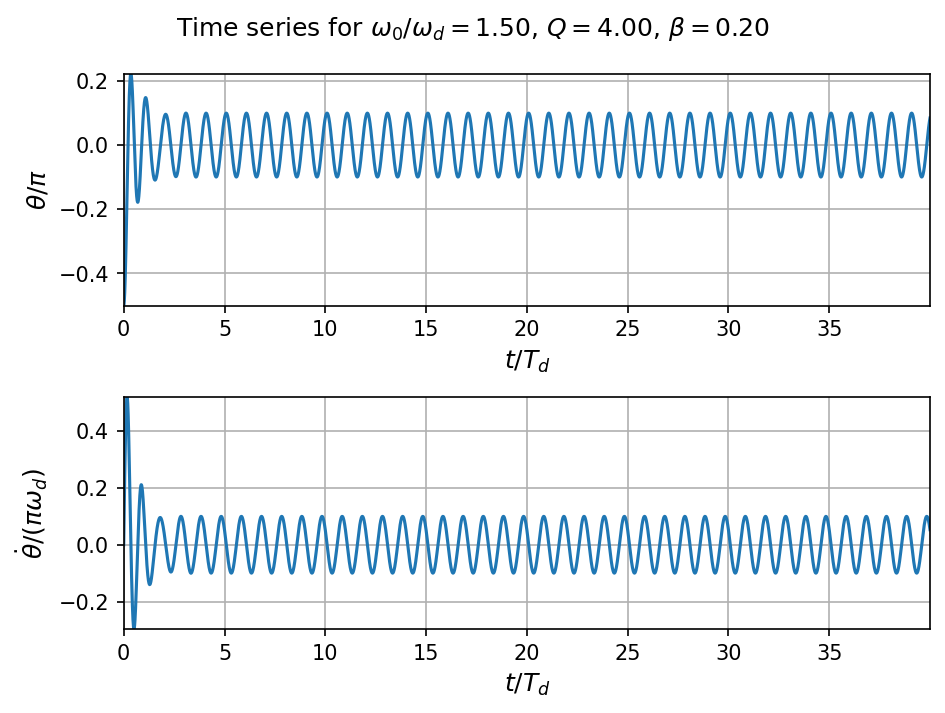

In [26]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=0.)

So, there is a transient at the beginning.
It is short-ish because we have quite a bit of damping: $Q=4$, technically in the weakly-damped regime, but low enough that a free oscillation decays after a only handful of oscillations.
Setting `tmin=4` ($t_{min} = 4\tau$ in seconds) in the time series should crop this initial transient and leave only the steady regime, and `t_min=35` should display only the last 5 driving periods. (I have not implemented this for the phase plot, I like seeing the transient there)

In [27]:
def plot_phase_ddp(th, dth, wd, w0, b, g, t, ftsz, nconts):
    """ draw phase plot; th is theta, dth is dtheta/dt, nconts is number of contours for U """
    # First, we plot the potential energy in the background
    thm = min(min(th)/pi, -1)  # lower x limit; 
    thM = max(max(th)/pi, +1)  # upper x-limit
    dthM = 1.1*max(max(abs(dth))/pi/wd, +1)  # y-limit; symmetric around zero
    th_lin = np.linspace(thm, thM, 512)
    dth_lin = np.linspace(-dthM, dthM, 64)
    thg, dthg = np.meshgrid(th_lin*pi, dth_lin*pi*wd)
    Ug = 0.5 * dthg**2 + w0**2 * (1-np.cos(thg))  # not the right units; only want the shape
    plt.contourf(thg/pi, dthg/pi/wd, Ug, nconts, alpha=0.1)  # alpha controls transparency
    # separatrix
    plt.contour(thg/pi, dthg/pi/wd, Ug, [2*w0**2], colors='r', linestyles='--', linewidths=0.5)
     
    # Then we plot the phase trajectory
    # plt.plot(th/pi, dth/pi/wd, 'r.', markersize=2)
    plt.scatter(th/pi, dth/pi/wd, c=t, cmap='copper_r', s=1.0)  # c=t means color-coded by t; s is size
    plt.ylabel(r'$\dot\theta/(\pi\omega_d)$ [rad/s]')
    plt.xlabel(r'$\theta/\pi$')
    plt.title(r"$\phi$-plot for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    # plt.axis(xmin=-1, xmax=1)
    plt.tight_layout()
    plt.show()
    return

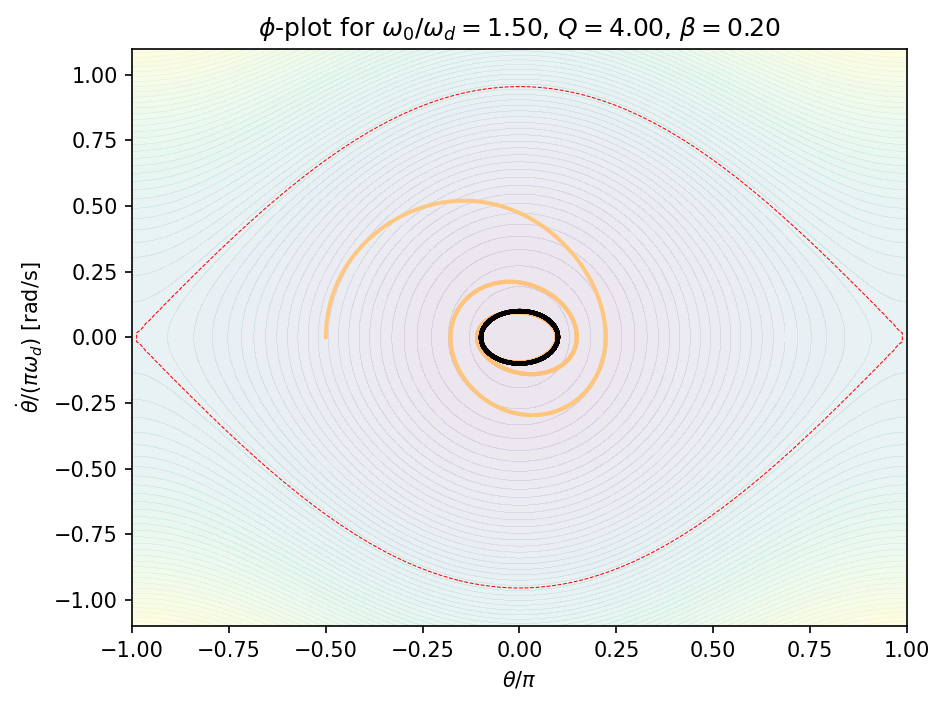

In [28]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=64)

After a while, we reach a steady-state in which our phase space shows only an ellipse-like trajectory (the light orange trajectory in the centre).
Note that the steady-state phase plot does not exactly follow iso-$U$ contours, the ellipse is slightly flatter: the pendulum gains energy when the the driving work is positive, loses energy when the driving work is negative and/or damping removes energy.
We therefore say that this system has an **attractor** (since the trajectory was attracted to this ellipse) and that in this case, the attractor is a *single-period cycle*.
That is, at this $\beta$, after every period, the motion completes 1 full ellipse.  

For the initial $\beta = 0.2$ rad ($\approx 11^\circ$), the forcing is very weak, and the oscillations are periodic with period $\tau$, as predicted by linear theory.
Let's check it on a Fourier plot.

In [29]:
def spectrum_ddp(th, wd, w0, b, g, t, tmin, ftsz):
    """ This one plots the spectrum. Best results will be achieved if
    tmin is as small as possible, but large enough that the transient
    is excluded. It should also be an integer number of periods for the
    function to be periodic. Otherwise, big wiggles. """
    
    th_for_Fourier = th[t>=tmin]
    An = 2*rfft(th_for_Fourier, norm='forward')
    # To make the Fourier plot interpretable, numpy.fft has a function to create
    # an x-axis made out of frequencies instead of mode numbers. See below. 
    w_array = np.fft.rfftfreq(len(th_for_Fourier), t[1]-t[0])*2*pi
    
    plt.semilogy(w_array/wd, abs(An), label='$A_n$')
    plt.axvline(1., ls=":", c='k', lw=0.5)
    plt.xlabel('$\omega/\omega_d$', fontsize=ftsz)
    plt.ylabel('$|A_n|$', fontsize=ftsz)
    plt.title(r"Fourier coeffs for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    plt.xlim(0., 10.)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return

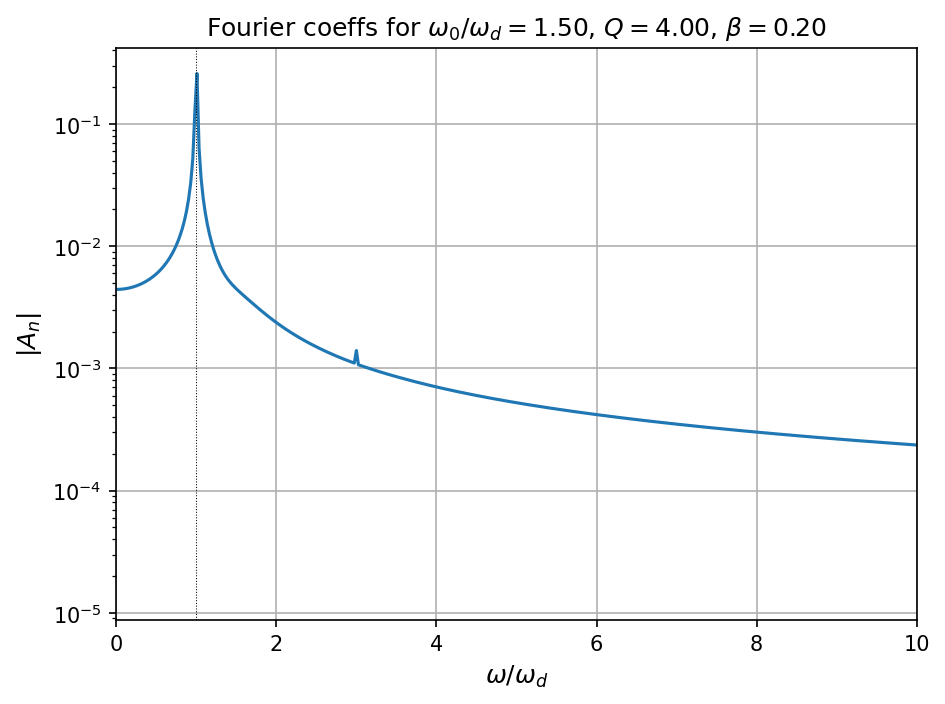

In [30]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 4., ftsz)

So, we see peaks at $\omega = \omega_d$, a tiny superharmonic at $3\omega_d$, but it's faint.

Let's crank it up! Push to $\beta = 0.9$.

In [31]:
beta = 0.9  # 52º
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

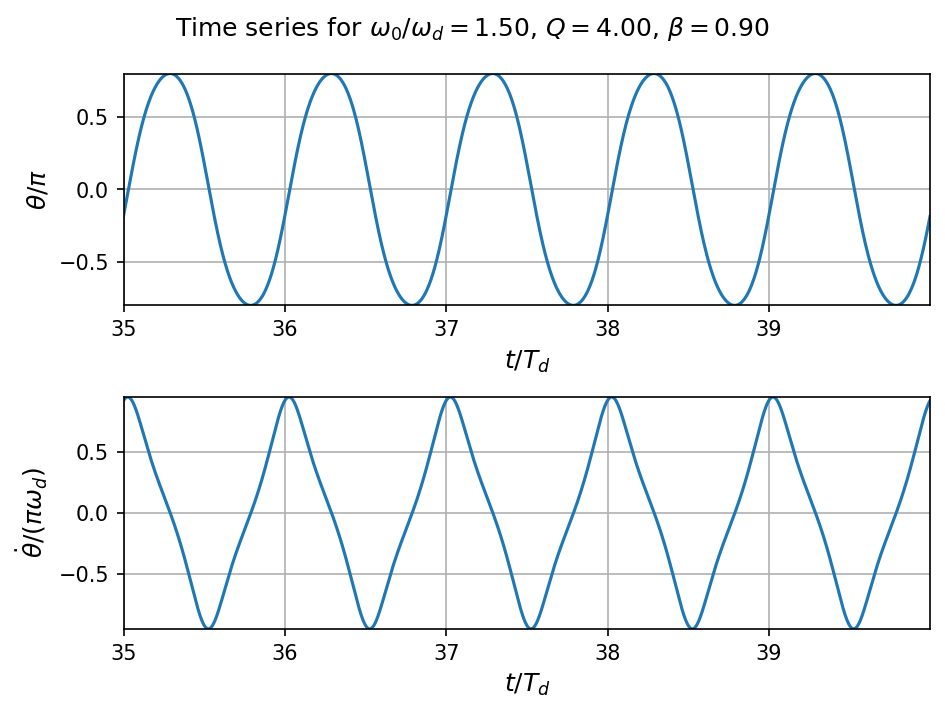

In [32]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=35.)

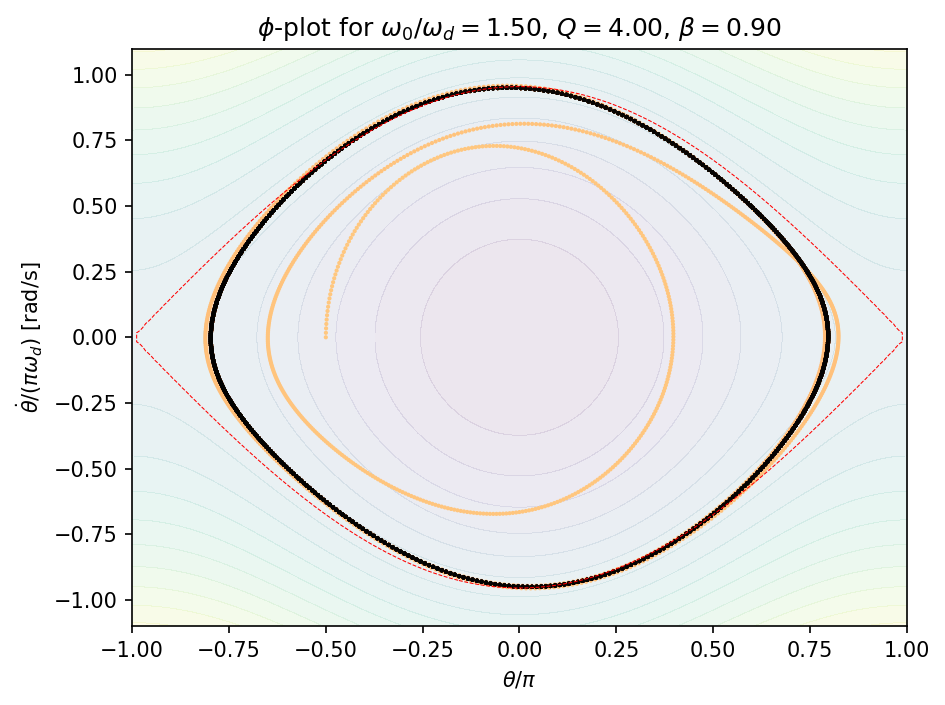

In [33]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=16)

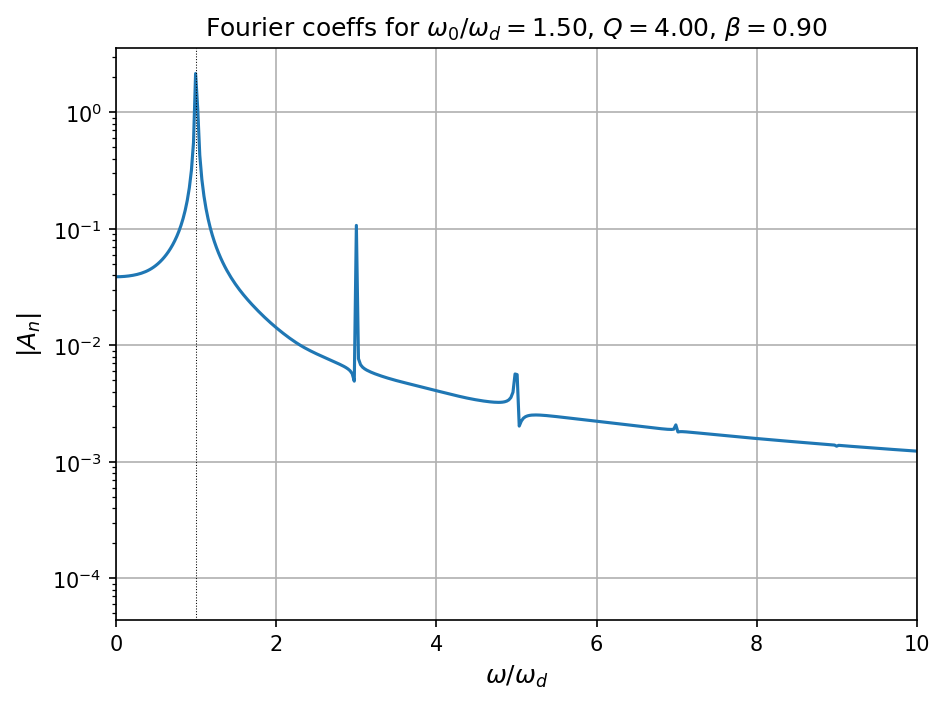

In [34]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 5., ftsz)

For $\beta = 0.9$, the amplitude is much larger, we might be detecting a flattening of the tops, confirmed by the appearance of the superharmonics at $\omega = 3\omega_d$, $5\omega_d$, $7\omega_d$ and maybe (just maybe) $9\omega_d$.
The phase plot still shows a single-period attractor, but this time it is clearly not an ellipse.
Squinting hard, we can identify the parts of the cycle where the forcing gives energy to the system (that is, when the trajectory climbs the contours) and parts of the cycle where the system loses energy (when the trajectory goes down).

The amplitude is close to $\pi$: we're close to the pendulum going over the top.
Let's crank it up once more...

In [35]:
beta = 1.2  # 69º
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

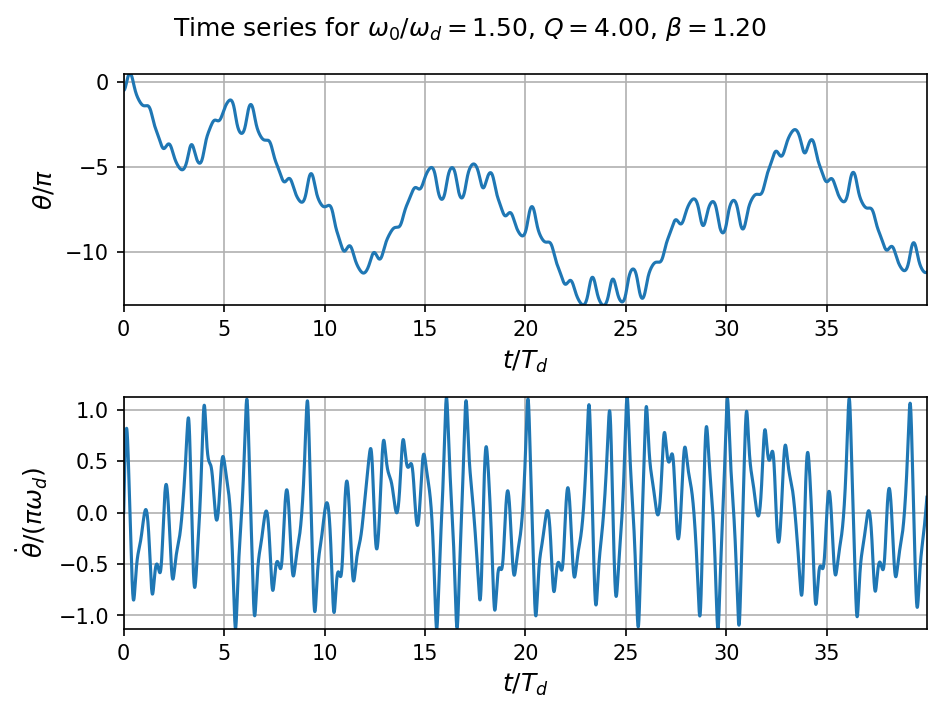

In [36]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=0.)

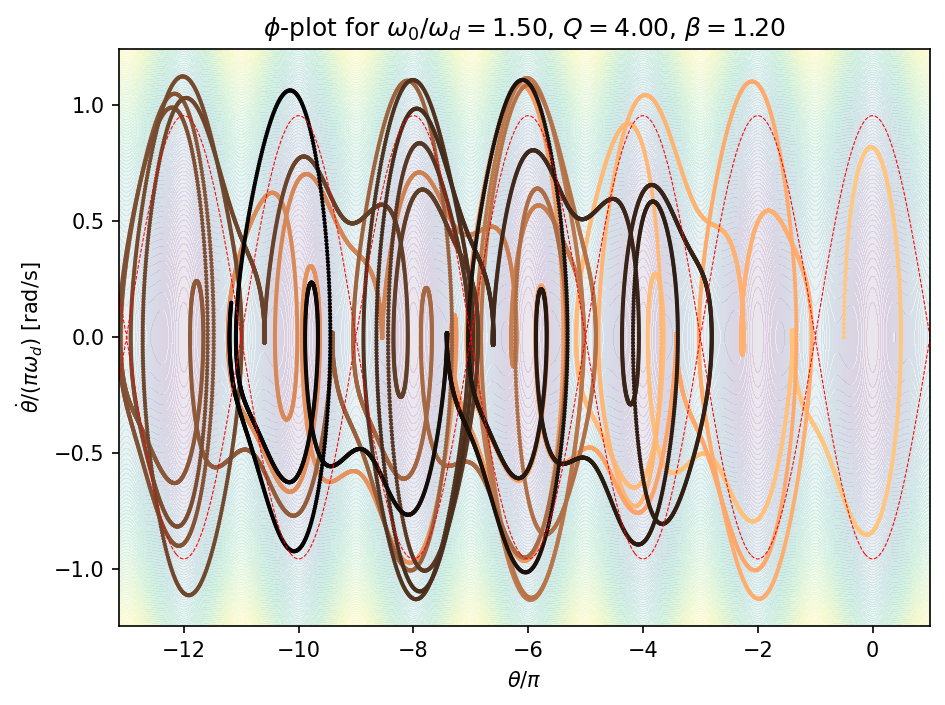

In [37]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=128)

Weee! The pendulum goes over the top, often.
Also, the signal is not periodic anymore: this is a signature of chaos.
The phase plot shows it quite remarkably, with the phase trajectory never settling into a closed trajectory.

Let me pause for a sec and comment on the fact that the pendulum goes over the top sometimes, and how the phase plot is moderately useful like this.
With the particular set of parameters I used ($\omega_d$, $\omega_0$, $\gamma$, $\beta$), the phase plot becomes very long.
Right now, it's OK: it goes over but stays in each potential well for a while, so, the plot is still readable.
But with more driving, the pendulum could undergo rolling motion.
And if it did, the plots in phase space could look kind of wild, with the angle jumping from potential well to potential well along the $\theta$ axis, making the phase plot very wide and details hard to read.
We therefore make the phase plot "periodic": if $\theta$ tries to "escape" on the left because it is doing a barrel roll clockwise, we make it re-enter the central potential well from the right.

In [38]:
def wrap_theta(th):
    """ map all theta values onto the branch -pi<theta<pi """
    th_wrapped = th[:] % (2*pi)  # First, move everything between [0, 2*pi]
    for i in range(len(th)):  # second, move everything between [pi, 2*pi] in [-pi, 0]
        if th_wrapped[i] > pi:
            th_wrapped[i] = th_wrapped[i] - 2*pi
    return th_wrapped

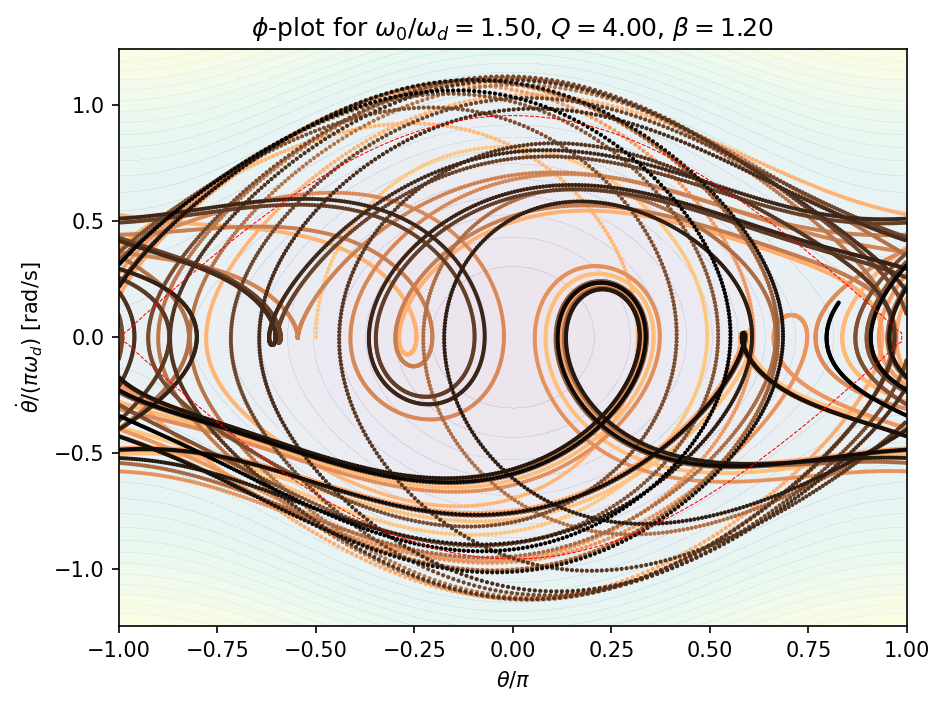

In [39]:
theta_wrapped = wrap_theta(theta)
plot_phase_ddp(theta_wrapped, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=32)

That's better.

Periodicity is now hard to see. What is the Fourier spectrum saying?

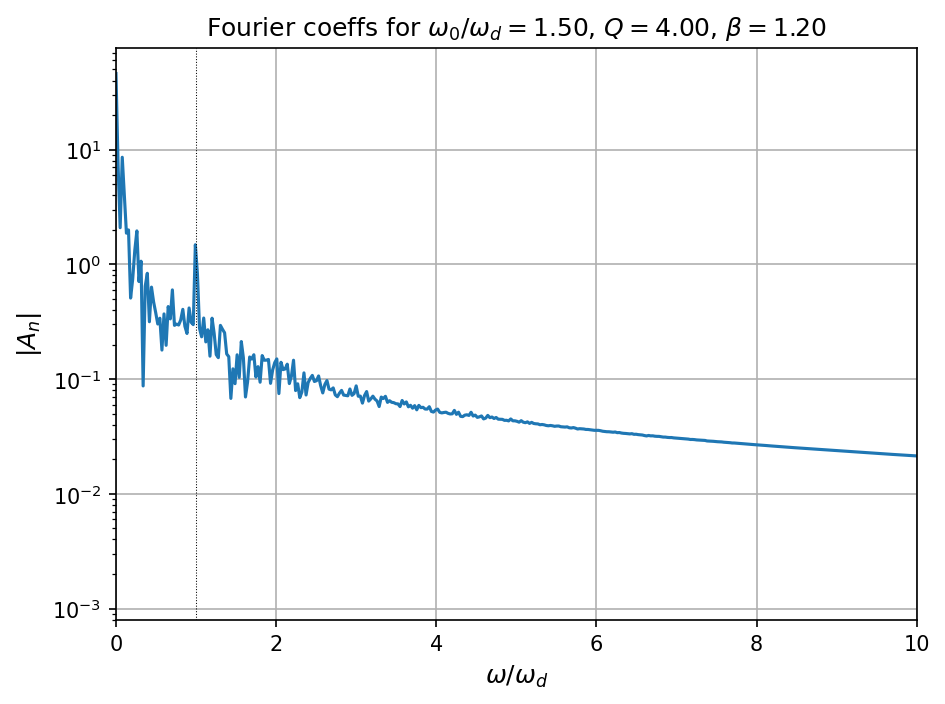

In [40]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 5., ftsz)

So, the periodicity due to the driving is still there.
But besides that, it's a mess of frequencies: there are plenty of superharmonics, and they are not multiple of $\omega_d$.
But there are also *subharmonics*: frequencies that are less than $\omega$.
In fact, the lower-frequency signals appear more important, indicating that long-term motions (the drift from potential well to potential well each time the pendulum does a barrel roll is such an example) have taken much more importance.

We just witnessed the appearance of chaos: very unpredictable dynamics, where periodicity gave way to all sorts of frequencies. Let me now go beyond this illustration and talk about chaos in a more systematic way.

# Chaos

## Definition

Chaos refers to the irregularity or unpredictability of certain motions.
It is important to note that this "unpredictability" is **not** because we don't understand the equations that govern the system. We can solve the equations, but inherently, the solutions cannot be predicted long in advance.
In other words, you can know the equations perfectly and still end up with chaos.
This type of chaos is called **Deterministic chaos**, and is a feature of many systems of ordinary differential equations.

Perhaps the most defining feature of chaotic systems is their **sensitivity to initial conditions**: if we knew initial conditions perfectly, we could technically predict the outcome equally as perfectly.

This is what Pierre-Simon Laplace was writing about in 1814 in *A philosophical[^3] essay on probabilities*:
> "We may regard the present state of the universe as the effect of its past and the cause of its future.
    An intellect which at a certain moment would know all forces that set nature in motion, and all positions of all items of which nature is composed, if this intellect were also vast enough to submit these data to analysis, it would embrace in a *single formula* the movements of the greatest bodies of the universe and those of the tiniest atom;
        for such an intellect nothing would be uncertain and the future just like the past would be present before its eyes."

This "intellect" came to be known as "Laplace's demon".
Maybe, had QM not happened, Laplace could have been right even about classical chaotic systems.
But it is fundamentally impossible for such an intellect to exist, because even this formidable intellect would need a measuring device, and there is no version of the future where the perfect measuring device exists (again, QM will always be a hard limit on which hope and dreams crash).
Therefore, chaos.

[^3]: "Philosophy" had a wider meaning than it does today, although scientists still get Ph.D.'s or D.Phil.'s as their highest attainable degree.

 ## Requirements for chaos in continuous time systems

In order to study nonlinear systems, we are going to write our equations in a specific form.
Any system of ODEs, of **whatever** order, can be written as series of first-order ODEs for appropriately defined $x_n$'s:
\begin{align*}
\dot x_1 & = F_1(x_1,x_2,...,x_N)\\
\dot x_2 & = F_2(x_1,x_2,...,x_N)\\
& \vdots\\
\dot x_N & = F_N(x_1,x_2,...,x_N)
\end{align*}

For continuous time systems, which all our examples so far have been, the two necessary condition for chaos to occur is that

* $N\ge 3$, and that
* the system be nonlinear.

Notice there is no $t$ as an independent variable on the right hand side of the above equations.  We will see that $t$ can become one of these $x_i$'s in the system of equations.  

You can do that for any ODE indeed: take $\odeln5x t = 10$ for example.
You can define $x_1 \equiv x$, and this system becomes 
$$x_2 = \dot x_1,\quad x_3 = \dot x_2,\quad x_4 = \dot x_3,\quad x_5 = \dot x_4 \andeq\dot x_5 = 10.$$ 
Note that these equations are all linear: the first necessary condition is met, but not the second one.
There can be no chaos in this system, adopting an exponential (in fact, five of them) will give you the solution.

Also, those conditions are necessary, not sufficient: some non-linear waves (e.g., solitons at the surface of water) feature large or even infinite numbers of degrees of freedom, as well as non-linearity, and yet, they are perfectly predictable and not chaotic.

To solidify this concept further, here is another counter-example: something that is **unpredictable, yet not chaotic**: Brownian motion, which itself is an example of a random walk.
Brownian motion is experienced by e.g., a piece of pollen on the surface of water.
The pollen gets tossed around by collisions with surrounding water particles, making the motion erratic and unpredictable.
Yet this motion is **not** chaotic: the motion is unpredictable because of *external* circumstances, the collisions with the water molecules.
The motion itself is very linear, it's just inertial motion between two collisions.
But in the absence of information about the water molecules, the motion is *not deterministic*: it is as if the next move will be drawn from the roll of a dice.
This is especially important in quantum mechanics, where outcomes of given processes are inherently drawn from probability distributions.

The DDP on the other hand was started at known angle and initial velocity, and yet, it was unpredictable. 
Chaos is about a system being *internally*, or inherently, unpredictable.
And yet, it was *deterministic*: actions or initial conditions led to unambiguous outcomes.


|               | Stochastic processes | Chaotic processes |
| :------------- | :--------------------: | :-----------------: |
| Unpredictable? | Yes | Yes |
| Why?          | External reasons | Sensitivity to initial conditions |
| Deterministic? | No (probabilistic) | Yes ($x = \int\dot x \di t$) |

This table is of course probably too simplistic...


Traditionally, physicists sort chaotic systems into two categories:

* Hamiltonian systems: In those, mechanical energy is conserved, the system remembers its initial conditions for ever, and the dynamics does not feature attractors. **The** historical example is the three-body problem, which pretty much laid the foundations of chaos theory. Poincaré published it in in 1889, then retracted it, only to publish the fully corrected version about a decade later, in the form of a whole book. I won't say much more about this in PHY254, but you may see it in PHY354 or PHY460.
* Dissipative-driven systems. The DDP is one. Chaotic dynamics in this category tend to end up in "attractors", and contrary to the first category where you could technically revert time and end up with the initial conditions, these systems forget about their initial conditions if you wait for the transient phase to subside.
    If you pick the system in or around its attractor, going back in time would leave you with too many possible initial conditions. This is the category we will study, because it features many important concepts of chaos, while being simple to set up.

# Transition to chaos for the damped, driven pendulum (DDP)

## Chaos and the DDP

Recall that our non-linear pendulum is lightly damped with damping coefficient $\gamma$, it is driven at angular frequency $\omega_d$, and its equation of motion is
\begin{equation}
\ddot \theta + 2\gamma \dot \theta + \omega_0^2\sin\theta = \omega_0^2 \beta \cos(\omega_d t),
\label{eq:DDP}
\end{equation}
with $\beta$ some measure (in rad) of how hard we drive it.

Define 
\begin{align*}
x_1 & \equiv \theta\\
x_2 & \equiv \dot\theta=\dot x_1 \\
x_3 & \equiv \omega_d t
\end{align*}
Then we can write Eq. \eqref{eq:DDP} as the following system:
$$\left.\begin{array}{cclc}\dot x_1&=&x_2&\mbox{ (linear) }\\
\dot x_2&=&-2\gamma x_2 -\omega_0^2\sin x_1+\beta\omega_0^2\cos x_3&\mbox{ (nonlinear) }\checkmark\\
\dot x_3 &=& \omega_d&\mbox{ (linear)}
\end{array}\right\}\ N=3\checkmark$$

We now have a system of three 1st order equations for $x_1, x_2, x_3$ and there is nonlinearity in the system (because of the $\cos$ and $\sin$ terms).  **So there is a possibility of chaos.**

## Poincaré sections

That last example looked messy in phase space, and so did it in Poincaré's three-body problem.
That's because we now know from above that we are really looking at a 3D phase space ($\theta$, $\dot \theta$, $\omega_d t$), collapsed along the $\omega_d t$ axis.
And because the $\omega_d t$ axis is also associated with periodic motion (the forcing), we would also fold it on itself every $\omega_dt =2\pi$, just like the $\theta$ axis. Like the sketch below.

![](3D_phase_space.png)

If we had an easy way to represent 3D volumes, we could make an attempt, but it would require serious graphic design chops neither Poincaré or I possess(ed).

Instead, Poincaré had the idea of only plotting slices across the phase space at judiciously chosen intervals and to collapse them together.

Here, we will apply this trick by only plotting one point every forcing period.
This is equivalent to wrapping the time axis on itself (a trajectory finding itself at coordinates $(\theta, \dot \theta)$ at $\omega_d t = 2\pi$ re-enters the phase space at the same $(\theta, \dot\theta)$ at $\omega_d t= 0$ instead of keeping on going along the time axis), and slicing the phase-space across one value of $\omega_d t$.
This is an example of what is called a **Poincaré section**.
Let's see what it would look like in our first three examples.

In [41]:
def Poincare_section(n_cyc, n_per_Td, it_min, th, dth, t, wd, w0, g, b, ftsz):
    """ draw Poincare section; ncyc is how many forcing cycles we computed, 
    n_per_Td is how many iterations per driving cycle, it_min is where we start
    (to skip transient), th is theta, dth is dtheta/dt 
    """
    
    # We select which points we need
    # the time array: start at it_min, skip every n_per_cyc
    PC_t = t[it_min::n_per_Td]*2*pi/wd
    Pc_th = th[it_min::n_per_Td]  # theta sub-array
    PC_dth = dth[it_min::n_per_Td]  # dtheta/dt sub-array
    
    Pc_th_wrapped = wrap_theta(Pc_th)
    plot_phase_ddp(Pc_th_wrapped, PC_dth, wd, w0, b, g, PC_t, ftsz, nconts=32)
    return

In [42]:
beta = 0.2

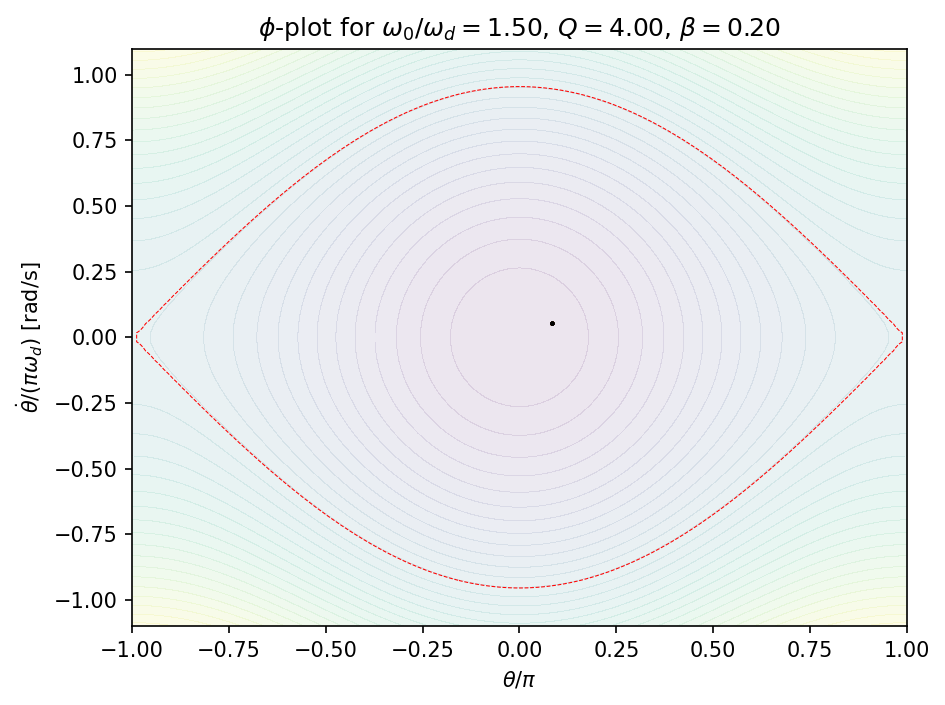

In [43]:
# For pdf export
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)
Poincare_section(num_cycles, ntTd, 4*ntTd, theta, dottheta,
                 time, omegad, omega0, gamma, beta, ftsz)

In [44]:
# For some reason, the interactive slider doesn't work all the time
interact(Poincare_section, n_cyc=fixed(num_cycles), n_per_Td=fixed(ntTd),
         th=fixed(theta), dth=fixed(dottheta), t=fixed(time), wd=fixed(omegad),
         w0=fixed(omega0), g=fixed(gamma), b=fixed(beta), ftsz=fixed(ftsz),
         it_min=IntSlider(min=int(4.*ntTd), max=int(5.*ntTd), step=int(0.01*ntTd), value=4*ntTd))

interactive(children=(IntSlider(value=2000, description='it_min', max=2500, min=2000, step=5), Output()), _dom…

<function __main__.Poincare_section(n_cyc, n_per_Td, it_min, th, dth, t, wd, w0, g, b, ftsz)>

In case you missed it, that was for $\beta=0.2$, which is a very linear case.
Do you see the Poincaré section? It's the little speck near the middle of the picture, around $\theta=0.1$.
Of course, a Poincaré section is not very useful for a single-cycle periodic motion, because it shows the same point over and over again.
The case $\beta = 0.9$ would show something similar, because superharmonics are "filtered out" in a Poincaré section.

## Two-period attractor: $\beta=1.07$

After $\beta=1$, things evolve quickly.
Let's try $\beta=1.07$, which is just before chaos starts.
We first plot the time series, the phase plot, and the Fourier coefficients because we haven't seen this experiment before.

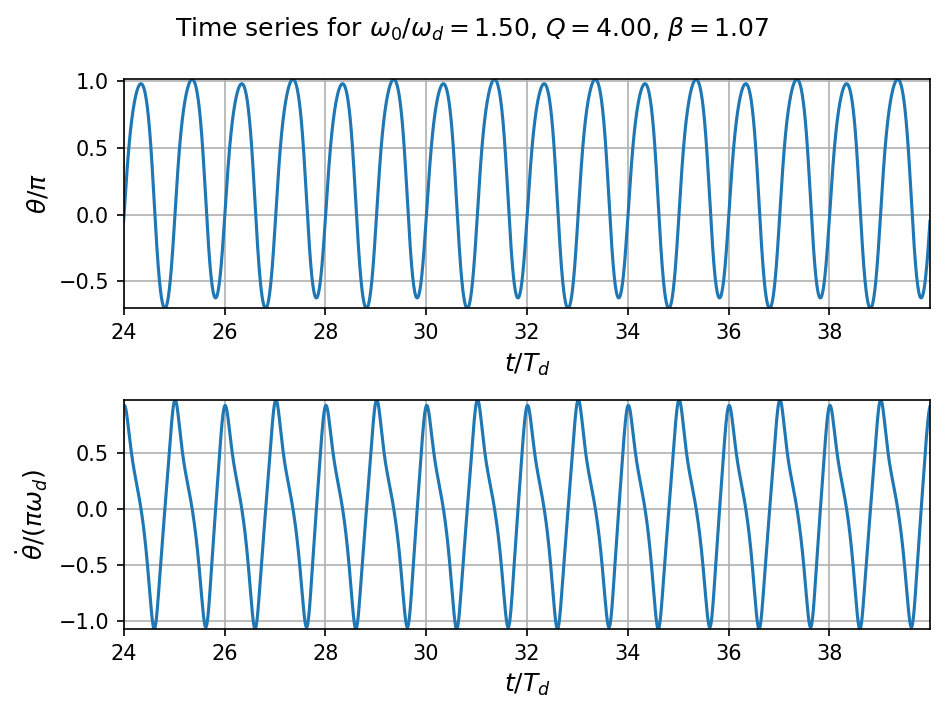

In [45]:
beta = 1.07  # have to run a new one
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)
plot_TS_ddp(theta, dottheta, omegad, omega0, beta,
            gamma, time/Td, ftsz, tmin=24.)


If you look closely at the values of the local extrema (it is a bit more visible in the local minima of $\theta$), you see  a two-cycle periodicity: the minima located just before even numbers of periods ($t/T_d \approx 26$, $28$,...) are slightly below those in-between.

In the Fourier plots, we can see a *sub-harmonic* appear at $\omega_d/2$. You can also notice that peaks start appearing between integer numbers of the frequency, which is how the non-linear term $\sin\theta$ in the pendulum reacts to the appearance of a sub-harmonic motion. See below.

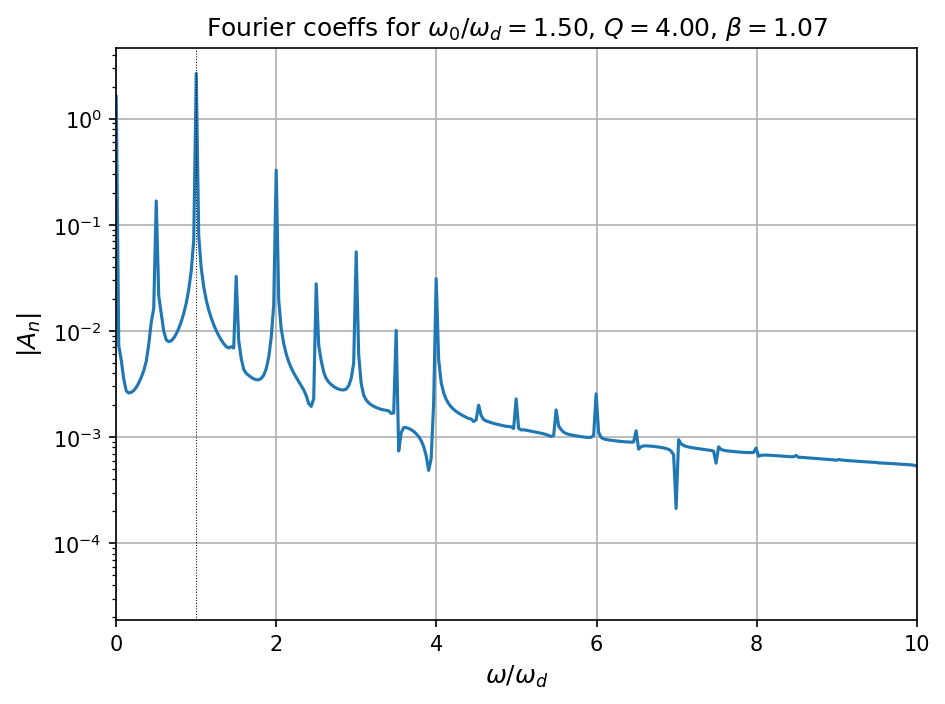

In [46]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 24., ftsz)

As for the phase plot, see below.

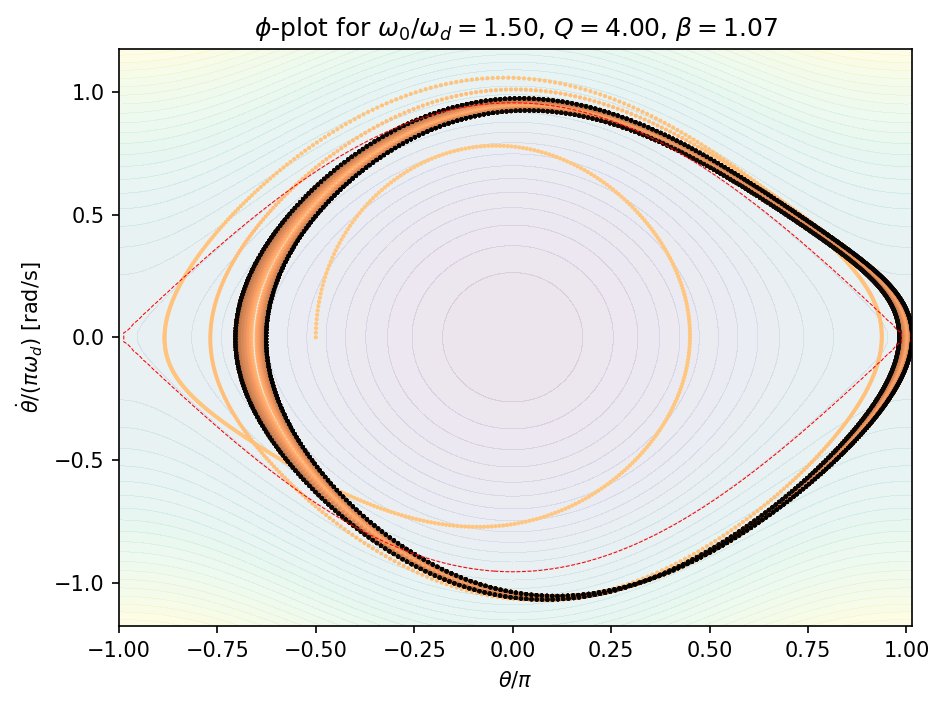

In [47]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time, ftsz, nconts=32)

Focus on the dark traces, which are the stationary regime (the lighter traces correspond to the early transient).
The full cycle indeed appears to be split into two, but it is still closed and therefore periodic.
We can thus characterize this motion with 2 periods:

1. the time it takes to cover an angle of $2\pi$ around the graph and
2. the time it takes to get back to exactly the same spot as before, which is $2T_d$.

In the Poincaré section, the first period is the time it takes to go from one dot to the other dot (this is the driving frequency).  The second period is the time it takes to go from one dot to the other dot, then back to the first dot. In this example, it is twice the driving period (or equivalently, half the driving frequency).  This attractor is known as a "two period cycle" because you bounce between 2 cycles.

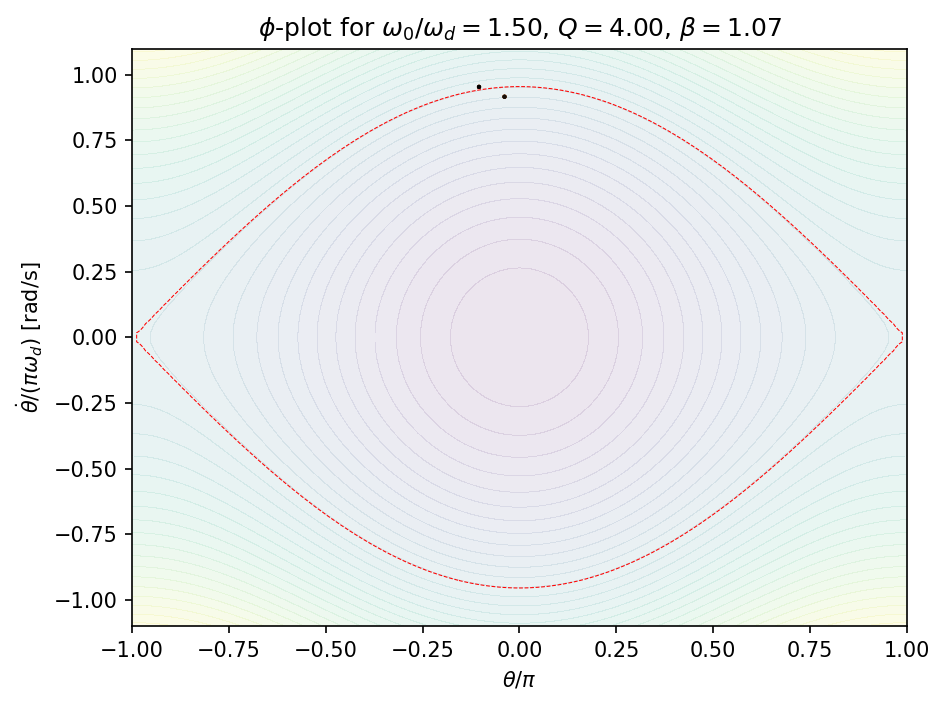

In [48]:
Poincare_section(num_cycles, ntTd, 24*ntTd, theta, dottheta,
                 time, omegad, omega0, gamma, beta, ftsz)

# Summary

This is where we ended the lecture, and we will pick it up again next time. Some intermediate conclusions:

* Fourier analysis is a powerful tool to examine the frequency content of oscillations.
* When oscillations are non-linear, modes exchange energy.
* In broad strokes, the more non-linear an oscillation is, the more we see harmonics outside of the main frequency on a spectrum plot.
* Time derivatives see more distorsion by non-linear effects, all else being equal.
    For example, velocity $v$ is more visibly affected by harmonics than position $x$, because if $x = \sum_n \boxed{A_n} \cos(\omega_n t)$, then $v \propto \sum_n \boxed{nA_n}\sin(\omega_n t).$ 
* The two necessary (but not sufficient) conditions for the appearance of chaos.
* Chaos is mainly defined by an unsurmountable sensitivity to initial conditions.
* Chaos means that the state of a system is unpredictable, but at least in the examples we have seen today, it is still **deterministic**.
* The damped-driven pendulum meets the minimum requirements for chaos, and does exhibit chaos for strong enough driving amplitude.
* Phase trajectories are useful to examine periodicity of simple motion: for example, one cycle means one-period attractor.
* At small driving amplitude, oscillations end up along line attractors in phase space.
* When the motion becomes more complicated (e.g., chaotic), straight-out phase plots become too hard to interpret because there is at least one "hidden" dimension to phase space. Poincaré sections plot only 2D slices  across this space, and can more readily show how many periods there are in one attractor.
* On the way to chaos, as driving amplitude increases, period-doubling happens: we go from one- to two-period attractors... and more, as we will see next.

# Appendix: The Fermi-Pasta-Ulam-Tsingou (FPUT) experiment

*This famous historical experiment was formerly called the "Fermi-Pasta-Ulam" experiment, until calls to rename the experiment were made in 2008. Tsingou was a programmer, whose gender I will let you guess.*

Waves, like simple oscillations, are subjected to the same effects as simple oscillations: a non-linear superposition of waves will lead to interactions between them, energy exchanges, and unpredictable behaviour.
In many cases, the dynamics becomes a mess: the system is expected to "thermalize", i.e., if the energy is initialized in a given mode with some coupling between the modes, and if one waits long enough, non-linear effects should spread the energy in all the modes.

This was a thought experiment until the advent of computers.
In the 1950's, FPU & T decided to test their brand-new computer, the Mathematical Analyzer Numerical Integrator and Automatic Computer Model I (MANIAC I), located in what I imagine was an entire room at the Los Alamos Scientific Laboratory.
They needed a really hard problem, and they settled on computing the motion of a chain of masses, coupled by springs, with one simulation including a quadratic non-linearity, and the other a cubic non-linearity.
And because they really wanted to make a splash, they decided to couple a whopping 64 masses together (imagine that!).

This is widely considered to be the very first numerical simulation ever. Before, computers were used to compute numbers, output the results of complicated formulas, for artillery calculations for example. This on the other hand was the first time, scientists asked the question: "What if I asked a computer to give me the solution to a problem whose outcome I cannot predict?"

So, the simulation with the quadratic non-linearity solved the system of equations
\begin{equation}
    \ddot y_n = y_{n+1} - 2y_n + y_{n-1} + \alpha\left[(y_{n+1} - y_n)^2 + (y_n-y_{n-1})^2\right],
    \label{eq:FPUTquadratic}
\end{equation}
with $\alpha$ a small number controlling the degree of non-linearity, and the experiment with the cubic non-linearity was solved for 
$$\ddot y_n = y_{n+1} - 2y_n + y_{n-1} + \beta\left[(y_{n+1} - y_n)^3 + (y_n-y_{n-1})^3\right],$$
with $\beta$ also controlling the degree of non-linearity.

I have never tried coding this experiment, and there are repos online where you will find Python implementations of it. I suspect that it isn't hard, but I will simply show you the output, taken directly from Wikipedia (https://commons.wikimedia.org/wiki/File:Fermi%E2%80%93Pasta%E2%80%93Ulam%E2%80%93Tsingou_recurrence.gif; Author: Jacopo Bertolotti, CC0, via Wikimedia Commons).

![](Fermi–Pasta–Ulam–Tsingou_recurrence.gif)

So, here you clearly see the difference between linear and non-linear: in the linear case, the energy stays in the first harmonic, while in the non-linear case, the energy spreads to other modes.

But what was really surprising was that the energy just didn't stay in these modes, or didn't keep moving from mode to mode somewhat unpredictably: periodically, the energy would gather back into the first harmonic, and the cycle would repeat.

Another surprising thing was the propagating structures that would develop a little bit after the simulation started: the oscillation would become asymmetric, and would look like a steep front, followed by a long tail.
And a little bit after that, secondary bumps would develop.

It took about a decade before people made headways into understanding this problem.
First, Kruskal & Zabusky made the connection with the Korteweg-de Vries equation, which was famous for surface water waves and had been solved in the late 1890's.
Then, the number of "sub-bumps" and their amplitude was solved entirely by Miura in 1968.
These bumps were then called "solitons", because in an infinite domain, they would propagate as isolated bumps, like a single wavelength that got separated from the others.

And who knows, you may see the continuous version of this wave sooner than you think: https://www.physics.utoronto.ca/~phy326/sol/